<a href="https://colab.research.google.com/github/Nowitkiewicz/PortfolioProjects/blob/main/dog_vision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
from IPython.display import Image
labels = pd.read_csv("/content/drive/MyDrive/dog_vision/labels.csv")

#filenames = os.listdir("/content/drive/MyDrive/dog_vision/train/")
filenames = ['/content/drive/MyDrive/dog_vision/train/' + fname + '.jpg' for fname in labels['id']]
fileBreed =["/content/drive/MyDrive/dog_vision/train/" + fname for fname in labels['breed']]

#from matplotlib.pyplot import imread, imshow
#image = imread(filenames[1])
#imshow(image)

In [2]:
fileBreed[0]

'/content/drive/MyDrive/dog_vision/train/boston_bull'

In [3]:
import numpy as np
uniquebreeds = np.unique(fileBreed )
#len(uniq),type(uniq),uniq[0]
fileBreed[0] == uniquebreeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [4]:
boolean_labels = [label == uniquebreeds for label in fileBreed]
len(boolean_labels)

10222

In [5]:
print(fileBreed[0])
print(np.where(uniquebreeds == fileBreed[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

/content/drive/MyDrive/dog_vision/train/boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split
X = filenames
y = boolean_labels
X_train,X_val,y_train,y_val = train_test_split(X, y , test_size = 0.2)



Preprocessing image to tensor 1.take an image file as input 2.use tensorflow to read and save to variable image 3.turn image (jpg) into Tensors 4.resize image to 224,224



In [ ]:
tensor = tf.constant(image)
tensor

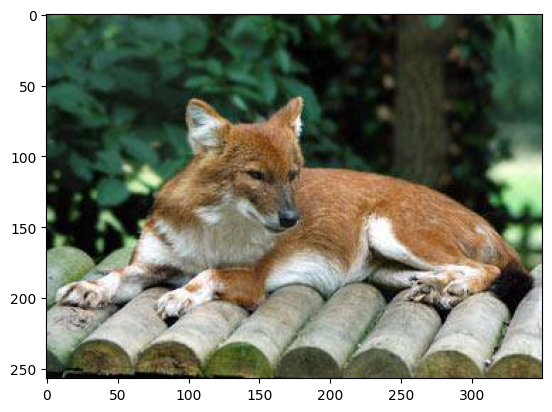

In [7]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
imshow(image)

In [9]:
#define image size
IMG_SIZE = 224

#Creating function for preprocessing image

def process_image(image_path,img_size = IMG_SIZE):
    """ Takes an image from image_path and turns it into tensors
    """
    #Read an image file
    image = tf.io.read_file(image_path)

    #Take an image ( jpg) and turn it into numbers
    image = tf.image.decode_jpeg(image, channels = 3)

    #Convert color channel from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    #Resize the image to our desired value
    image = tf.image.resize(image, size = [IMG_SIZE,IMG_SIZE])

    return image

In [ ]:
process_image(X[2])
image

Turning our data into batches.


Create a function to return a tuple (image,label)

In [37]:
def get_image_label(X, y):
    """Takes an image filepath name and assoassociated label,
    processes the image and return a tuple (image,label)
    """
    image = process_image(X)

    return image, y

In [ ]:
get_image_label(X[0],y[0])

Let's turn all of our data into batches.

In [33]:
#Define batch size of 32
BATCH_SIZE = 32
#Create a function to create a batches from given data.
def create_data_batches(X, y = None , batch_size = BATCH_SIZE,valid_data = False, test_data = False):
    """ Create batches of data out of image (X)  and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no label)
    """
    #If the data is test dataset we probably don't have labels
    if test_data:
        print("Creating test databatches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    #if the data is a valid set we don't need to shuffle it.
    elif valid_data:
        print("Creating validation databatches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                                   tf.constant(y))) #labels

        data_batch = data.map(get_image_label).batch(BATCH_SIZE)

        return data_batch

    #Turn filepaths and labels into tensors.
    else:
        print("Creating training databatches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                 tf.constant(y)))
        #Shuffling data and labels.
        data = data.shuffle(buffer_size = len(X))
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)

    return data_batch


In [40]:
create_data_batches(X, y , batch_size = BATCH_SIZE,valid_data = True, test_data = False)

Creating validation databatches...


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [39]:
create_data_batches(X, y  , batch_size = BATCH_SIZE,valid_data = False, test_data = False)

Creating training databatches...


<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>